# Начало

Рассмотрим применение методов понижения размерности как для некоторых "игрушечных" данных, так и для датасета MNIST. Попутно, чтобы было чуть более интересно, попробуем решить задачу классификации цифр из датасета MNIST при помощи, возможно, самого интуитивно простого метода классификации: [метода ближайших соседей](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_%D0%B8_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9#:~:text=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85%20%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9%20%E2%80%94%20%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%B5%D0%B9%D1%88%D0%B8%D0%B9%20%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9,%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85%20%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9%20(%D0%B0%D0%BD%D0%B3%D0%BB.), качество и скорость работы которого достаточно сильно зависят в том числе от размерности рассматриваемого пространства признаков.

Импортируем датасет MNIST (только тестовую его часть из 10 тыс. изображений)

In [1]:
from keras.datasets import mnist
(_, _), (X, y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
X.shape

(10000, 28, 28)

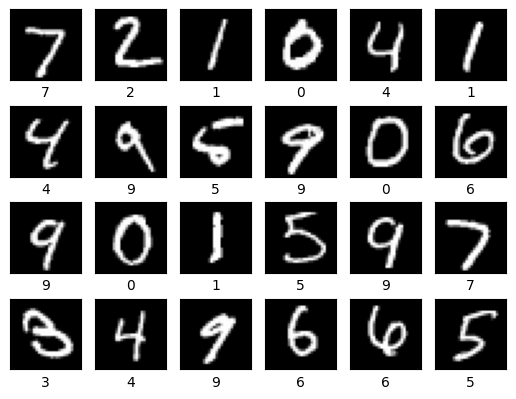

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Как выглядит одна картинка

In [4]:
print(X[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

Видно, что имеем достаточно больше число нулей по краям изображений. А может это во всех изображениях так?

In [5]:
import numpy as np
np.max(X, axis=0)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  38, 236, 158, 233, 198, 255, 253, 255,
        255, 255, 255, 191, 253, 254, 254, 158,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 192, 254, 216, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 234,   5,   0,
          0,   0],
       [  0,   0,   0,   0, 139, 217, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 234,
        163,   0],
       [  0,   0,   0, 114, 206, 255, 254, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        246,   0],
       [  0,  24,  13,  80, 254, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254,
        232,   0],
       [  0,   0,  26, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        253, 152],
       [  0, 128, 191, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 146],
       [  0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        248, 211],
       [140, 247, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        254, 219],
       [226, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253,
        253, 243],
       [ 38, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        253, 156],
       [  0, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         86,   0],
       [  0, 153, 213, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        251,   0],
       [  0,   0, 228, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254,
        168,   0],
       [  0,   0, 223, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253,
        237,  67],
       [  0,  47, 254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253,
        214, 106],
       [  0,   0, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253,
        140, 121],
       [  0, 126, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        247, 101],
       [  0, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        253,  20],
       [  0,  36, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        168,   0],
       [  0,   0, 221, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253,
        236,   0],
       [  0,   0, 249, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 253,
        149,   0],
       [  0,  24, 198, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 210, 224,
          1,   0],
       [  0,   0,   0, 253, 252, 255, 25

Во всех 10 тыс. изображений по углам есть пиксели, которые не несут никакой информационной нагрузки.

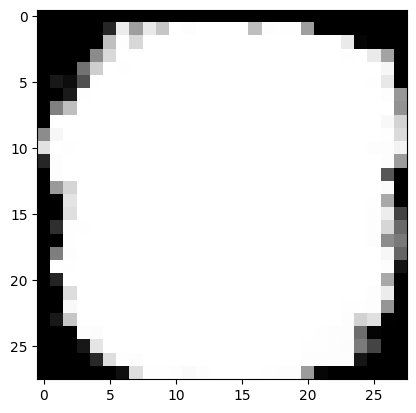

In [6]:
plt.imshow(np.max(X, axis=0), cmap='gray')

Посмотрим, много ли получится сэкономить, если избавиться от неинформативных признаков.

In [7]:
mask_max = np.max(X, axis=0)
# Можно выкинуть только нули
X_reduced = np.array([x[mask_max!=0] for x in X])

# Или вообще все, интенсивность которых менее 10% от максимально возможной
#X_reduced = np.array([x[mask_max >= 25] for x in X])
X_reduced.shape

(10000, 668)

Руководствуясь такими нехитрыми соображениями можно уменьшить размерность пространства признаков почти на 15 процентов.

In [8]:
X = X.reshape(len(X), -1)
X.shape

(10000, 784)

Сравним результаты классификации для обоих случаев:

Исходные данные:

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import time
import pandas as pd
start = time.time()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_test)
f_1_score = f1_score(y_test, y_pred, average='weighted')
end = time.time()
print('Затрачено времени: ', end - start)
print('f-score', f_1_score)

Затрачено времени:  2.9252195358276367
f-score 0.947363464518633


Данные с отбрасыванием неинформативных признаков:

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
start = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_reduced,y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_test)
f_1_score = f1_score(y_test, y_pred, average='weighted')
end = time.time()
print('Затрачено времени: ', end - start)
print('f-score', f_1_score)

Затрачено времени:  3.2608654499053955
f-score 0.947363464518633


Видно, что качество классификации осталось абсолютно таким же, при этом виден небольшой, но приятный бенефит по времени.

# PCA

Рассмотрим применение метода ГК на игрушечном датасете из синтетических данных: 60 объектов, 10 признаков.

In [11]:
link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


Разобъем данные на условный трейн/тест

In [12]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

Понизим размерность пространства признаков до двух при помощи библиотечной реализации PCA и построим объекты в новом пространстве признаков. Обучать преобразование будем на тренировочных данных и затем применять его к тренировочным и тестовым.

In [13]:
from sklearn.decomposition import PCA
pca_lib = PCA(svd_solver='full', n_components=2)
pca_lib.fit(data_train)
data_train_lib = pca_lib.transform(data_train)
data_test_lib = pca_lib.transform(data_test)
print('Пример тренировочных данных:\n')
print(data_train_lib[:5])
print('----------------------------')
print('Пример тестовых данных:\n')
print(data_test_lib[:5])

Пример тренировочных данных:

[[-15.34195578  29.08649152]
 [-17.41445808   3.30208276]
 [-18.82486075 -32.88165333]
 [-18.04761825   1.23030977]
 [-18.22587371  -0.70299577]]
----------------------------
Пример тестовых данных:

[[-19.11779771 -31.04841706]
 [-15.43421323 -33.17210086]
 [-14.32814038 -30.99206917]
 [-19.85830521   2.33931934]
 [-14.33889455  29.64452535]]


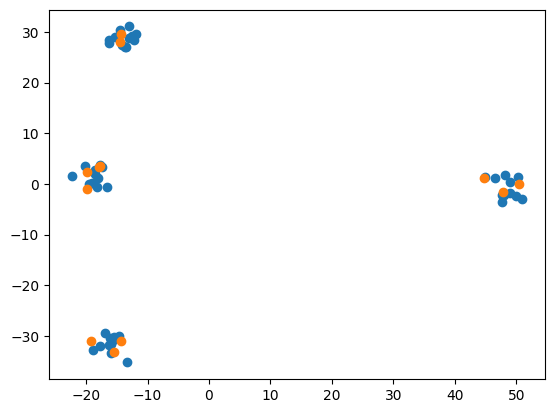

In [14]:
plt.scatter(x=data_train_lib[:,0], y=data_train_lib[:,1])
plt.scatter(x=data_test_lib[:,0], y=data_test_lib[:,1])

Полученные векторы весов первых двух ГК.

In [ ]:
pca_lib.components_

array([[ 0.18251724, -0.04571694,  0.41175428, -0.06951097, -0.14561036,
         0.45767485,  0.03017797,  0.5500017 , -0.50380823, -0.04816741],
       [-0.01443456,  0.33080245,  0.52477057,  0.23919111, -0.02464832,
         0.14341111,  0.1992988 ,  0.06664511,  0.61503724, -0.33787303]])

## **Задача**

Релизуйте следуюшие функции для моделирования в конечном итоге метода главных компонент.

In [ ]:
# Центрирование данных

def center_data(X):
  pass

data_train_centered =  center_data(data_train)

assert np.all(np.isclose(np.sum(center_data(data_train),axis=0),0))

In [ ]:
# Нахождение матрицы выборочных ковариаций
def get_cov_matrix(X):
  pass

cov_matrix = get_cov_matrix(data_train_centered)

assert np.all(np.isclose(get_cov_matrix(data_train_centered)[:,1], np.array([ -7.23437975,  61.54913978,  83.65257882,  23.54726533, -0.68837264,  19.07032901,  43.29364991, -40.77647958, 107.33704447, -38.29225944])))

In [ ]:
# Определение матрицы весов
def get_components(cov_matrix):
  # Собственные векторы и собственные числа: модуль np.linalg.eig
  # Сортируем собственные числа
  # Внимательно смотрим документацию: eig_vectors хранятся по столбцам
  pass

assert np.all(np.isclose(get_components(cov_matrix)[:,1], np.array([ 0.04571694,  0.33080245, -0.14465316,  0.31353673,  0.10504922, -0.14465471,  0.12291415,  0.04357705,  0.24610792, -0.81222756])))

In [ ]:
# Получение новых координат
def get_new_cords(X):
  pass

assert np.all(np.isclose(get_new_cords(data_train)[0], np.array([ 15.34195578,  29.08649152, -14.32567381,  -0.71192044, 2.15906699,  -1.65224772,  -0.08883479,  -0.61391865, -1.24074715,   0.4053417 ])))


Примените разработанную модель для описанных выше синтетических данных. Ваши результаты должны совпасть с библиотечными с точностью до коллинеарности векторов весов (могут отличаться знаками).

In [ ]:
# @title Для проверки своих результатов запустите следующую скрытую ячейку с кодом

from sklearn.decomposition import PCA

pca_lib = PCA(svd_solver='full', n_components=10)
pca_lib.fit(data_train)
data_train_lib = pca_lib.transform(data_train)
data_test_lib = pca_lib.transform(data_test)


data_train_man = get_new_cords(data_train)
data_test_man = get_new_cords(data_test)

flag = 0
for i in range(data.shape[1]):
  if not np.all(np.isclose(data_test_lib[:,i],data_test_man[:,i]) | np.isclose(data_test_lib[:,i],-1*data_test_man[:,i])):
    flag=1

if flag == 0:
  print('Тест успешно пройден')
else:
  print('Тест не пройден, проверьте значения координат')


# PCA для MNIST

Рассмотрим теперь применение МГК для датасета MNIST и последующей классификации.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# Используем столько ГК, чтобы обеспечить уровень объясненной дисперсии в 0.95
pca = PCA(svd_solver='full', n_components=0.95)

# Обучаем модель на train, применяем преобразование для train и для test
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [19]:
# Достаточно существенное сжатие при сохранении 95% информации
X_train_pca.shape

(8000, 149)

In [20]:
start = time.time()
knn = KNeighborsClassifier().fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
f_1_score = f1_score(y_test, y_pred, average='weighted')
end = time.time()
print('Затрачено времени: ', end - start)
print('f-score', f_1_score)

Затрачено времени:  0.4335298538208008
f-score 0.9509317582159151


Видно, что наблюдается прирост по скорости.

# PCA на MNIST для устранения шума

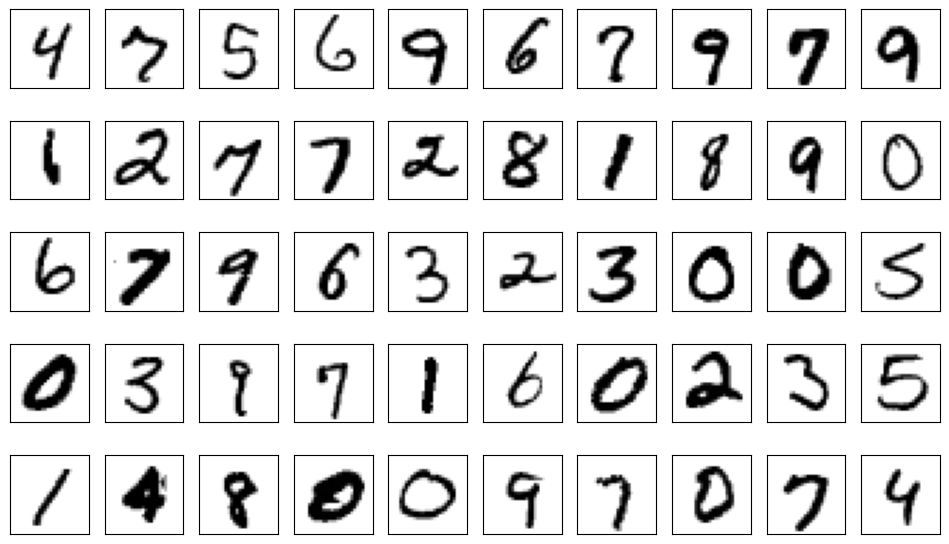

In [21]:
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.gray_r)

Добавим случайного шума в наши картинки

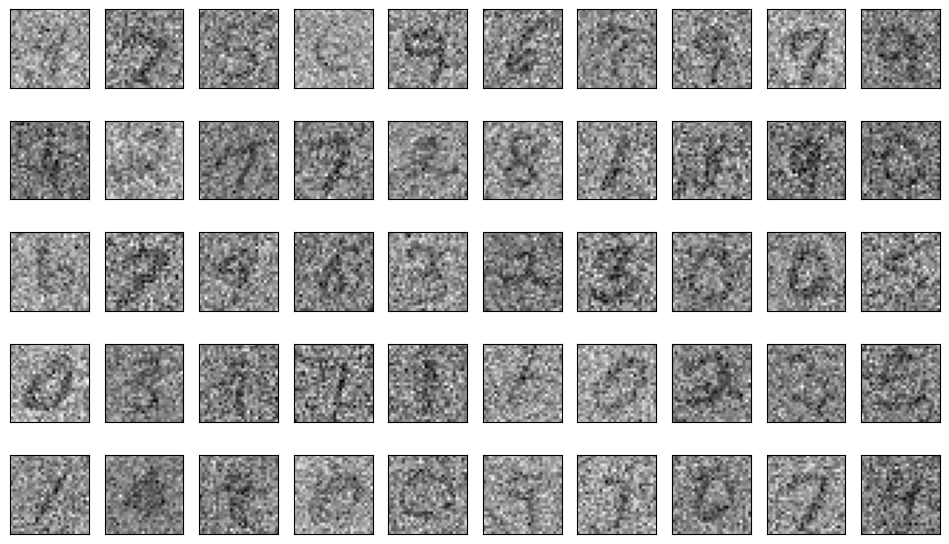

In [22]:
import numpy as np
np.random.seed(42)
MNIST_noisy = np.random.normal(X_train, 200)
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(MNIST_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

In [23]:
pca = PCA(0.2, random_state=0).fit(MNIST_noisy)
pca.n_components_

75

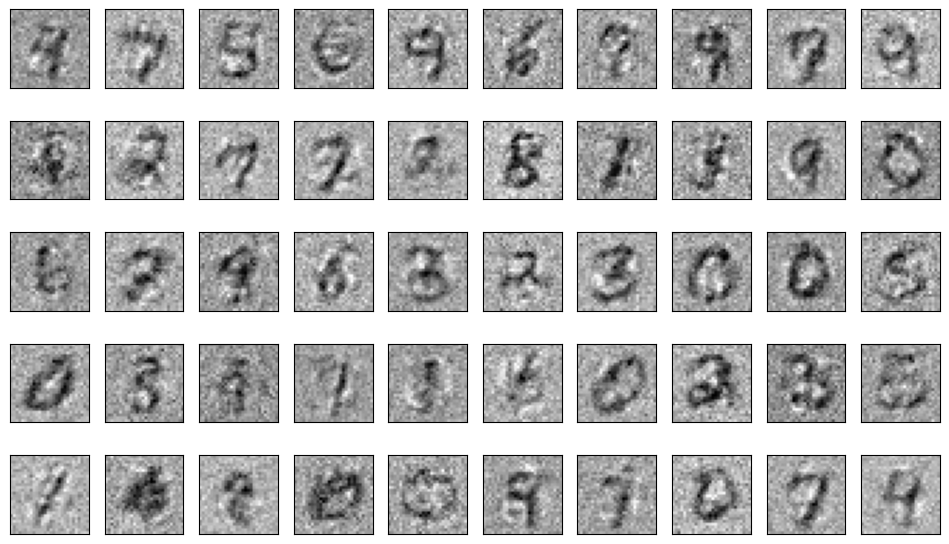

In [24]:
tr = pca.transform(MNIST_noisy)
un_tr = pca.inverse_transform(tr)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(un_tr[i].reshape(28, 28), cmap=plt.cm.gray_r)